## C S 329E HW 8

# Clustering with K-means 

## Elena Zhang, Emily Zhou

For this week's homework we are going explore our first clustering method:

  - K-Means
  
As we discussed in lecture, k-means creates clusters based on a distance measure.  Using a small example data set, we will implement the algorithm and visualize the results.

Even though the example data is small and 2 dimensional, write your helper functions to not assume a 2-D data set.  Your plotting code can reference the `x` and `y` column names from the sample data directly. 

Note that I have added a one or two lines of code to the questions to test your implementation. 

In [1]:
# Do not import anything else
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# K-Means

We will implement the Algorithm 7.1 "Basic K-means", and apply that algorithm to a small data set provided with the assignment in the `data_kmeans.csv` file. We will build up some helper functions along the way, test them, and put it all together to apply to our small example data set. 

In [2]:
# loading in our toy data
df_kmeans = pd.read_csv('data_kmeans.csv')

## Q1 - Write a function that returns `k` random rows from a data frame

To initialize the centroids, we pick `k` random points from a data frame.  Write a function `init_centroids( df_data, k )` that accepts two parameters: a data frame `df_data`, and an integer `k`, and returns the initial centroids for our k-means algorithm.  Note, we want the indices of the returned data frame to range from 0 - (k-1) so that we can use these as the centroid labels.  Use [pandas sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) method, and pass it the value of $42$ for `random_state`. 

In [3]:
def init_centroids( df_data, k ):
    return df_data.sample(n = k, random_state = 42 ).reset_index(drop=True) #pick k random points and reset the indices

In [4]:
# Testing our init centroid function
df_centroids = init_centroids( df_kmeans, 7 )
df_centroids

,x,y
0,-0.633437,0.488756
1,-0.597736,0.632194
2,-0.635867,0.166613
3,-0.539351,-0.875532
4,-0.588597,0.293062
5,-0.127985,-0.136639
6,0.342579,0.211717


## Q2 - Write a function to assign every row in a data frame to a centroid 

Write a function, `assign_to_centroid`, that accepts two parameters: a data frame, `df_data`, that represents our data to be clustered, and the data frame, `df_centroids`, which is of length `k` and contains the current centroids for our clusters.  The functions returns a series of the same length of `df_data` that contains the index of the closest centroid in `df_centroid`.  Use Euclidean distance as your distance measure. 

For example, if a row of data contained the data point $(100,123)$ and the three centroids were in a data frame that had the following information:

  - Index 0 : (34,34)
  - Index 1 : (0,1)
  - Index 2 : (83,99)

The `assign_to_centroid` function would assign the index $2$ to that row of data. 

In [5]:
def assign_to_centroid( df_data, df_centroids ):
    # for every observation in df_data
    closest_centroid = []
    for idx, row in df_data.iterrows():
        # calculate Euclidean distance from each centroid
        dist = (row - df_centroids).apply(np.linalg.norm, axis = 1)
        # find the index of the smallest distance
        min_dist_idx = dist.idxmin()
        # add the index of the min distance to the list
        closest_centroid.append(min_dist_idx)
    return pd.Series(closest_centroid)

In [6]:
# Check how many data points were assigned to each centroid
s_centroid_assignment = assign_to_centroid( df_kmeans, df_centroids )
s_centroid_assignment.value_counts()

6    126
1     94
3     71
5     58
0     53
2     26
4     22
dtype: int64

## Q3 - Write a function that recomputes the centroids

Write a function `compute_centroids` that takes two parameters: the data frame, `df_data` containing the data being clustered, and a series of the same length that contains the label of the assigned centroid for every row in df_data, `s_centroid_assignment`. The function will return the a data frame containing the centroids (mean) value for each unique centroid. 

Note that the indices in the returned data frame should correspond to the unique values in `s_centroid_assignment`.  For example, if I found the mean value of df_data using the slice corresponding to `s_centroid_assigment == 2`, then the centroid should be in the returned data frame at `.iloc[2]`. 


In [7]:
def compute_centroids( df_data, s_centroid_assignment ):
    # find unique centroids
    unique_cent = s_centroid_assignment.unique()
    # make a copy of df_data
    df_data_copy = df_data.copy()
    df_data_copy["centroid_idx"] = s_centroid_assignment
    # empty list to store all the averages
    averages = []
    # for every unique centroid index, find averages and assign averages
    for i in unique_cent:
        # find the average of data corresponding to an index
        avg = df_data_copy[['x','y']].where(df_data_copy["centroid_idx"] == i).mean()
        #add averages to averages list
        averages.append(avg)

    new_centroid_assignment = pd.DataFrame(averages) # create dataframe
    #make original indices the index of the dataframe and drop indices column
    return new_centroid_assignment

In [8]:
compute_centroids( df_kmeans, s_centroid_assignment)

,x,y
0,-0.696694,-0.699028
1,-0.721574,0.708343
2,-0.715983,0.500552
3,-0.546913,0.321364
4,-0.738268,-0.113830
5,-0.102365,-0.188876
6,0.523364,0.238569


In [9]:
# Test it out
df_new_centroids = compute_centroids( df_kmeans, s_centroid_assignment)
df_new_centroids

,x,y
0,-0.696694,-0.699028
1,-0.721574,0.708343
2,-0.715983,0.500552
3,-0.546913,0.321364
4,-0.738268,-0.113830
5,-0.102365,-0.188876
6,0.523364,0.238569


## Q4 - Write a function that compares two centroid data frames

The stopping criterion for k-means is when our centroids have not moved since the last iteration.  Write a function `compare_centroids` that is given 2 centroid data frames, `df_centroid_a`, and `df_centroid_b` as parameters and returns `True` or `False` indicating if the centroids at each unique index in the data frame are equal. Use the [equals](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.equals.html) method to compare equality of pandas Series objects. 

In [10]:
def compare_centroids( df_centroid_a, df_centroid_b ):
#     print(df_centroid_a.index)
#     print(df_centroid_b.index)
    return df_centroid_a.equals(df_centroid_b)

In [11]:
# Test it out, should print True followed by False
print(compare_centroids( df_new_centroids, df_new_centroids ))
print(compare_centroids( df_new_centroids, df_centroids ))

True
False


## Q5 - Write a function that implements k-means

Write a function, `k_means`, that takes in as parameters 2 values, a data frame with values to cluster, `df_data`, and the number of clusters to form, `k`.  The function should return a series of data of the same length as `df_data` that contains the cluster assignment (an integer from 0 to (k-1)) for each row of data.  Use the helper functions defined in the prior questions. 

In [12]:
def k_means( df_data, k ):
      
    #initialize random centroids
    centroids = init_centroids(df_data, k)
    #assign to nearest inital centroid
    assignment = assign_to_centroid(df_data, centroids)
    #calculate mean of centroid
    recomputed_centroids = compute_centroids(df_data,assignment)
    
    #compare centroids and re-cluster until centroids have not moved since the last interation
    while not compare_centroids(centroids, recomputed_centroids):
        centroids = recomputed_centroids #keep track of previously assigned to centroids
        assignment = assign_to_centroid(df_data, recomputed_centroids) #assign to centroids
        recomputed_centroids = compute_centroids(df_data,assignment) #compute new centroid (mean value)
    
    #return cluster assignment when centroids don't move
    return assignment
    

In [13]:
# Call k_means with k = 5 to test
s_cluster_assignment = k_means(df_kmeans, 5)
s_cluster_assignment.value_counts()

1    178
0     89
2     74
4     63
3     46
dtype: int64

## Q6 - Plot the results

Plot the points in the `df_kmeans` data frame using a 2-D scatter plot, with a different color for each cluster.  Use the cluster assignments from the previous problem (`s_cluster_assignments`).  Label your axes, and give the plot a title. 

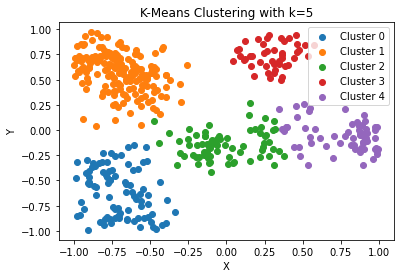

In [14]:
# Plot each cluster using a loop

# add cluster label to original data frame
df_kmeans['cluster label'] = s_cluster_assignment

for cluster_id in s_cluster_assignment.unique():
    cluster = df_kmeans[df_kmeans['cluster label'] == cluster_id]
    lab = "Cluster " + str(cluster_id) # Cluster label for legend
    plt.scatter(cluster['x'], cluster['y'], label = lab) # plot cluster

#add plot descriptions
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering with k=5')
plt.legend()
plt.show()